In [2]:
%load_ext autoreload
%autoreload 2

import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import transforms

# Convolutional neural networks [6 points]

Train the pre-defined network ``MNISTNet`` defined below on the MNIST dataset. You have to get an accuracy of at least 95% on a hidden test set. Use the loader from below as data loader of the trainig set.

In [6]:
from torchvision.datasets import MNIST

dataset = MNIST('data', download=True, transform=transforms.ToTensor())
loader = DataLoader(dataset, batch_size=16, num_workers=4)


In [7]:
print(len(dataset)) #this is only training set

el = dataset[3]                 #el is a tuple containing 2 list 1 image 2 its labels
print(type(el))
print(el[0].shape)                #image is again a sub list inside el so it is [1,28,28] so calling el[0][0] accesses the sblist image first then the 1st element inside the image this has now size 28x28
print(el[1])

60000
<class 'tuple'>
torch.Size([1, 28, 28])
1


In [8]:
batch = iter(loader).next()   #batch is an iterator which gives a single list at a time. each list has 2 elements, element 0 is a list of 4 images and element 1 is a list of its labels

data = batch[0]                     #this image is a 3D tensor => CxWxH which means image is again a list inside list
labels = batch[1]
print(data.shape)
print(labels.shape)

torch.Size([16, 1, 28, 28])
torch.Size([16])


Text(0.5, 1.0, 'Label: 1')

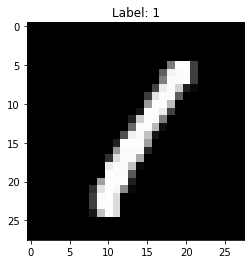

In [12]:
import matplotlib.pyplot as plt
plt.imshow(el[0][0], cmap='gray', vmin=0., vmax=1.)   #calls 1st element of tuple, the image. then the 1st channel of the image
plt.title('Label: {}'.format(el[1]))      

In [10]:
class MNISTNet(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.first_layer = nn.Sequential(nn.Conv2d(1, 16, 3, padding=1), nn.ReLU())
        self.conv_layers = nn.Sequential(*[nn.Sequential(nn.Conv2d(16, 16, 3, padding=1), nn.ReLU()) for _ in range(4)])
        self.last_layer = nn.Linear(28*28*16, 10)
    
    def forward(self, x):
        x = self.first_layer(x)
        x = self.conv_layers(x)
        x = x.reshape(-1, 28*28*16)
        x = self.last_layer(x)
        return x
        

In [13]:
net = MNISTNet() #net is a model of class MNISTNet network

#################
# train net!
import torch.optim as optim

num_epochs = 5
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.5)
loss_fun = nn.CrossEntropyLoss()

for epoch in range(num_epochs):
    net.train()
    correct = 0
    for batch_id, (data, target) in enumerate(loader):
        # Zeroing out gradients from previous step
        optimizer.zero_grad()
        # Forward pass 
        output = net(data)
        # loss calculation
        loss = loss_fun(output, target)
        # Backpropagation 
        loss.backward()
        # parameter adjustments as per the loss calculation
        optimizer.step()
        #tracking accuracy
        _, pred_labels = output.max(dim=1) 
        correct += (pred_labels == target).float().sum()
    accuracy = 100 * correct / len(dataset)    
    print('Train Epoch: {}/{}, Loss: {:.3f}, Accuracy: {:.3f}'.format(
                epoch+1,num_epochs, loss.item(), accuracy))  
    
#Tesing the trained model on test set
test_set = MNIST('data', train=False, transform=transforms.ToTensor())
test_loader = DataLoader(dataset=test_set, batch_size=16, shuffle=False) #first load test data to 

net.eval()
with torch.no_grad():
    correct = 0
    for data, target in test_loader:
        output = net(data)  
        _, pred_labels = output.max(dim=1) 
        correct += (pred_labels == target).float().sum()
    accuracy = 100 * correct / len(test_set)    
    print('Test Accuracy: {:.3f}'.format(accuracy))  
#################

torch.save(net.state_dict(), 'mnist_net.model')

Train Epoch: 1/5, Loss: 0.012, Accuracy: 89.110
Train Epoch: 2/5, Loss: 0.010, Accuracy: 97.798
Train Epoch: 3/5, Loss: 0.009, Accuracy: 98.418
Train Epoch: 4/5, Loss: 0.008, Accuracy: 98.782
Train Epoch: 5/5, Loss: 0.010, Accuracy: 99.005
Test Accuracy: 97.940


In [ ]:
# #loading test set
# test_set = MNIST('data', train=False, transform=transforms.ToTensor())
# test_loader = DataLoader(dataset=test_set, batch_size=16, shuffle=False)
# #evaluating the model(testing) based on the test data set
# net.eval()

# with torch.no_grad():
#     correct = 0
#     for data, target in test_loader:
#         output = net(data)  
#         _, pred_labels = output.max(dim=1) 
#         correct += (pred_labels == target).float().sum()
#     accuracy = 100 * correct / len(test_set)    
#     print('Test Accuracy: {:.3f}'.format(accuracy)) 

# CIFAR [4 bonus points]

Design a network architecture in ``modules.py`` and train on the CIFAR-10 data set provided by the data loader ``loader`` below. You have to get an accuracy of at least 60% on a hidden test set. Don not use any pre-defined or pre-trained network models.

In [3]:
from torchvision.datasets import CIFAR10
from modules import CIFARNet

dataset = CIFAR10('data', download=True, transform=transforms.ToTensor())
loader = DataLoader(dataset, batch_size=16, num_workers=4)

Files already downloaded and verified


In [4]:
print(len(dataset)) #this is only training set

el = dataset[2]                 #el is a tuple containing 2 list 1 image 2 its labels
print(type(el))
print(el[0].shape)                #image is again a sub list inside el so it is [1,28,28] so calling el[0][0] accesses the sblist image first then the 1st element inside the image this has now size 28x28
print(el[1])

50000
<class 'tuple'>
torch.Size([3, 32, 32])
9


In [5]:
#so we have 50,000 images in the training set and dataset variable is a tuple having two lists image 
#and ther corresponding labels
batch = iter(loader).next()   #batch is an iterator which gives a single list at a time. each list has 2 elements, element 0 is a list of 4 images and element 1 is a list of its labels

data = batch[0]                     #this image is a 3D tensor => CxWxH which means image is again a list inside list
labels = batch[1]
print(data.shape)
print(labels.shape)

torch.Size([16, 3, 32, 32])
torch.Size([16])


In [6]:
#checking flattening
x = torch.ones(16,5,5)
x = x.reshape(-1, 5*5*16)
print(x.shape)


torch.Size([1, 400])


In [7]:
net = CIFARNet()

#################
# train net!
import torch.optim as optim

num_epochs = 25
optimizer = optim.SGD(net.parameters(), lr=0.003, momentum=0.9)
loss_fun = nn.CrossEntropyLoss()

for epoch in range(num_epochs):
    net.train()
    correct = 0
    for batch_id, (data, target) in enumerate(loader):
        # Zeroing out gradients from previous step
        optimizer.zero_grad()
        # Forward pass 
        output = net(data)
        # loss calculation
        loss = loss_fun(output, target)
        # Backpropagation 
        loss.backward()
        # parameter adjustments as per the loss calculation
        optimizer.step()
        #tracking accuracy
        _, pred_labels = output.max(dim=1) 
        correct += (pred_labels == target).float().sum()
    accuracy = 100 * correct / len(dataset)    
    print('Train Epoch: {}/{}, Loss: {:.3f}, Accuracy: {:.3f}'.format(
                epoch+1,num_epochs, loss.item(), accuracy))  
    
#Tesing the trained model on test set
test_set = CIFAR10('data', train=False, transform=transforms.ToTensor())
test_loader = DataLoader(dataset=test_set, batch_size=16, shuffle=False) #first load test data to 

net.eval()
with torch.no_grad():
    correct = 0
    for data, target in test_loader:
        output = net(data)  
        _, pred_labels = output.max(dim=1) 
        correct += (pred_labels == target).float().sum()
    accuracy = 100 * correct / len(test_set)    
    print('Test Accuracy: {:.3f}'.format(accuracy)) 
#################

torch.save(net.state_dict(), 'cifar_net.model')

Train Epoch: 1/25, Loss: 2.308, Accuracy: 40.772
Train Epoch: 2/25, Loss: 2.075, Accuracy: 51.994
Train Epoch: 3/25, Loss: 1.926, Accuracy: 56.106
Train Epoch: 4/25, Loss: 1.901, Accuracy: 58.698
Train Epoch: 5/25, Loss: 2.127, Accuracy: 60.602
Train Epoch: 6/25, Loss: 1.885, Accuracy: 62.200
Train Epoch: 7/25, Loss: 1.923, Accuracy: 63.630
Train Epoch: 8/25, Loss: 1.908, Accuracy: 64.566
Train Epoch: 9/25, Loss: 1.515, Accuracy: 65.736
Train Epoch: 10/25, Loss: 1.514, Accuracy: 66.612
Train Epoch: 11/25, Loss: 1.802, Accuracy: 67.168
Train Epoch: 12/25, Loss: 1.287, Accuracy: 67.862
Train Epoch: 13/25, Loss: 1.395, Accuracy: 68.606
Train Epoch: 14/25, Loss: 1.200, Accuracy: 69.170
Train Epoch: 15/25, Loss: 1.211, Accuracy: 69.970
Train Epoch: 16/25, Loss: 1.163, Accuracy: 70.010
Train Epoch: 17/25, Loss: 1.660, Accuracy: 70.878
Train Epoch: 18/25, Loss: 1.197, Accuracy: 71.092
Train Epoch: 19/25, Loss: 1.171, Accuracy: 71.656
Train Epoch: 20/25, Loss: 1.179, Accuracy: 71.766
Train Epo